<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Statistical_Summative_Course_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Report: Applying Machine Learning to Red Wine Quality Prediction**

**Introduction:**

Machine learning is widely used in predictive modeling, particularly in classification and regression tasks essential for decision-making. In this project, I analyze the Red Wine Quality dataset from the UCI Machine Learning Repository. The dataset consists of physicochemical properties of red wine samples and their corresponding quality scores assigned by wine experts.

**Why Red Wine?**

This dataset includes two separate wine types: Red Wine and White Wine. However, their distributions significantly differ in terms of feature importance and class balance. To maintain consistency and avoid dataset-specific biases, I focus exclusively on the Red Wine dataset.

The primary objective of this project is to predict wine quality using various machine learning models (regression and classification) and deep learning models based on numerical physicochemical attributes.


**Dataset Information:**

The dataset consists of **Portuguese "Vinho Verde" red wine samples**, where the input variables represent physicochemical properties, and the output variable represents wine quality scores assigned by wine experts.

* **Data Source:** https://archive.ics.uci.edu/ml/datasets/Wine+Quality

* **Reference Paper:** Modeling Wine Preferences by Data Mining from Physicochemical Properties By P. Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, J. Reis (2009), Published in Decision Support Systems
Due to privacy and logistical constraints, the dataset does not include grape types, wine brands, or price information.

  * **Missing Values:** None (No missing values in the dataset).
  * **Data Type:** All features are continuous, except for the target variable (quality),which can be continuous or ordinal.

**Variables Table:**


\begin{array}{|l|l|l|}
\hline
\textbf{Feature Name} & \textbf{Type} & \textbf{Description} \\
\hline
\text{Fixed acidity} & \text{Continuous} & \text{Amount of non-volatile acids present} \\
\text{Volatile acidity} & \text{Continuous} & \text{Concentration of acetic acid} \\
\text{Citric acid} & \text{Continuous} & \text{Natural preservative in wine} \\
\text{Residual sugar} & \text{Continuous} & \text{Sugar left after fermentation} \\
\text{Chlorides} & \text{Continuous} & \text{Salt content in wine} \\
\text{Free sulfur dioxide} & \text{Continuous} & \text{SO$_2$ freely available in wine} \\
\text{Total sulfur dioxide} & \text{Continuous} & \text{Total SO$_2$, including bound forms} \\
\text{Density} & \text{Continuous} & \text{Density of wine} \\
\text{pH} & \text{Continuous} & \text{Acidity level} \\
\text{Sulphates} & \text{Continuous} & \text{Additives for microbial stability} \\
\text{Alcohol} & \text{Continuous} & \text{Alcohol content} \\
\text{Quality (Target Variable)} & \text{Integer (3-8)} & \text{Wine quality score assigned by experts} \\
\hline
\end{array}



**Project Objectives**

* **Data Preprocessing:**

  * Handle missing values (if any).
  * Analyze the distribution of target classes to assess class imbalance.
  * Apply data transformations (log transformation, standardization, resampling) to improve model performance.
  * Assess linear relationships between features and the target variable.
  * Identify categorical variables (if any) and apply one-hot encoding if needed.
  * Detect outliers and evaluate their impact on model performance.
  

* **Feature Engineering & Selection:**

  * Identify important features using correlation analysis.
  * Address skewness using log transformations.
  * Perform standardization or robust scaling where necessary.

* **Model Implementation & Evaluation:**

  * **Regression Models:**

    * Train and evaluate Linear Regression and other regression models.
    * Identify assumptions of each model and compare their suitability.
    * Compare regression models using:
      * Mean Squared Error (MSE)
      * R² Score (Coefficient of Determination)
  * **Classification Models:**
      * Convert the problem into a binary classification (Good vs. Bad quality) and a multiclass classification task.
      * Train and evaluate classification models:
        * Logisitic Regression
        * Decision Trees
        * Random Forest
        * XG Boost
        * PCA with Random Forest
  * Compare models using accuracy, confusion matrices, and ROC curves.

  * **Deep Learning Approach:**
    * Train a NN model (Deep Learning) for wine quality prediction
    * Optimize hyperparameters and compare its performance with traditional models.

* **Final Evaluation & Comparison:**

  * Compare results from Regression, Classification, and Deep Learning models.
  * Identify the best-performing model based on:
    * Accuracy/R²
    * Model Interpretability / Interpolation
    * Robustness to outliers and imbalanced data

  * Provide final recommendations on the most suitable model for wine quality prediction.



In [2]:
!pip install imbalanced-learn
!pip install smogn

In [3]:
!pip install -U imbalanced-learn

**Step-01 Import the necessary libraries for the whole project in the below cell:**



Quick brief on some of the main libraries before diving into the project:


* Pandas (pd): A powerful data analysis and manipulation library for Python Documentation: https://pandas.pydata.org/

* NumPy (np): A fundamental package for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices Documentation: https://numpy.org/

* Seaborn (sns): A Python visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics Documentation: https://seaborn.pydata.org/

* Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations in Python. Documentation: https://matplotlib.org/

* Scikit-learn: A machine learning library for Python that features various classification, regression, and clustering algorithms. Documentation: https://scikit-learn.org/

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import smogn
from sklearn.metrics import r2_score
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# Set the display options to show all columns
pd.set_option('display.max_columns', None)

**Step 2: Dataset Selection and Preparation**

**Dataset Description:**
The dataset contains 1599 records of red wine samples with 11 physicochemical properties as features and one quality score (integer values from 3 to 8) as the target variable.




In [5]:
# Step-02 Load the red wine dataset
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(red_wine_url, sep=';')


* **Step-03 Data Exploration and Preprocessing:** In this step, I prepare the dataset for machine learning models by performing exploratory data analysis (EDA) and preprocessing tasks to ensure data quality, improve model performance, and handle potential issues such as class imbalance, outliers, and feature scaling.

  * Handle missing values (if any) - **Step-03(a)**
  * Analyze the distribution of target classes to assess class imbalance. - **Step-03(b)**
  * Identifying Categorical Variables and Applying Encoding as Needed (One-Hot or Ordinal) - **Step-03(c)**
  * Assess linear relationships between features and the target variable.- **Step-03(d)**
  * Address skewness using log transformations.- **Step-03(e)**
  * Detect outliers and evaluate their impact on model performance. - **Step-03(f)**
  * Identify important features using correlation analysis.- **Step-03(g)**
  * Apply data transformations (log transformation, standardization, resampling) to improve model performance.- **Step-03(h)**
  * Perform standardization or robust scaling where necessary.- **Step-03(h)**

In [6]:

#Checking the data types of the dataset
df_red.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


**Display the first five rows of the dataset**

In [7]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Step 3(a): Checking for Missing Data:**

<br>

In [8]:
# Check for missing values
print("\nMissing values:")
print(df_red.isnull().sum())


Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**From the step-03(a), There are no missing values in this dataset**

<br>

**Step-03(b): Analyze the distribution of the target variable:**

<br>


In [9]:
# Step-03(b)
print("\nTarget variable distribution:")
print(df_red["quality"].value_counts())




Target variable distribution:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


**Results for Step-03(b): Summary of Target class distribution & Handling Imbalance:**

The dataset shows a clear class imbalance in the target variable (quality).
The distribution is as follows:

* 5: 681 samples
* 6: 638 samples
* 7: 199 samples
* 4: 53 samples
* 8: 18 samples
* 3: 10

**The dataset is imbalanced, with most wines rated 5 or 6. Very few samples belong to extreme ratings (3 or 4 or 8).**

# **Justification for Handling Imbalance mentioned in **Step-** *italicized text*

In [10]:
# Step-03(c) verify the unique values.
df_red.nunique().sort_values()

,0
quality,6
free sulfur dioxide,60
alcohol,65
citric acid,80
pH,89
residual sugar,91
fixed acidity,96
sulphates,96
volatile acidity,143
total sulfur dioxide,144


**Resutls for Step-03(c):**

* Quality has 6 unique values, making it a good candidate for either ordinal encoding or one-hot encoding. However, for regression I will use this target variable as continuous.
* The rest of the features have a high number of unique values, suggesting they are continuous rather than categorical.

<br>


In [11]:
display(df_red.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<br>

**Key Takeaways from the above table:**
* Features: volatile acidity, citric acid, residual sugar, chlorides, and total sulfur dioxide have a few extreme high values, which might need scaling or log transformation.

* Quality is mostly 5-6, so the dataset may have imbalanced classes.
* Alcohol and SO₂ levels vary widely, which could be important predictors of quality.
* Density does not vary much, so it might be redundant unless correlated with other features.
* Outliers: residual sugar, chlorides, and total sulfur dioxide might need handling - This will further investigated in box plot step.

<br>


**Step-03(d) Assess linear relationships between features and the target variable:**

<br>


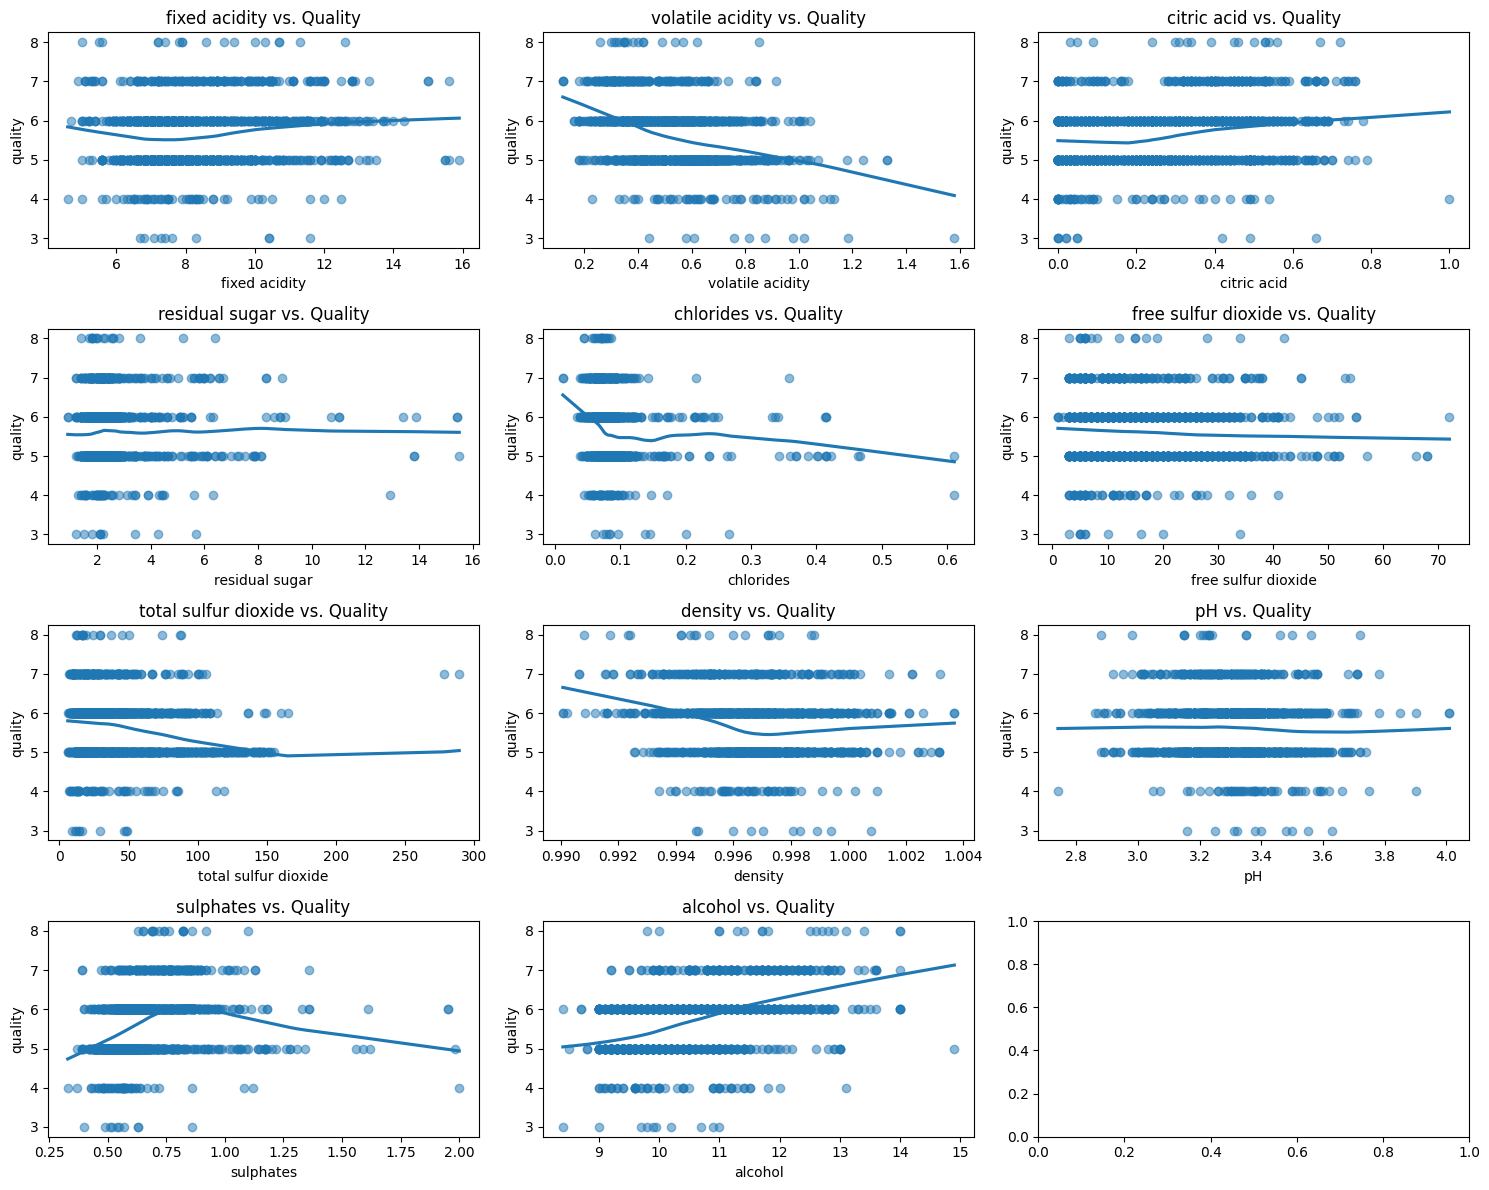

In [12]:
#Step-03(d)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots with LOESS curves
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df_red.columns[:-1]):  # Exclude 'quality' (target)
    sns.regplot(x=df_red[col], y=df_red["quality"],lowess=True, ax=axes[i], scatter_kws={"alpha": 0.5})
    axes[i].set_title(f"{col} vs. Quality")

plt.tight_layout()
plt.show()


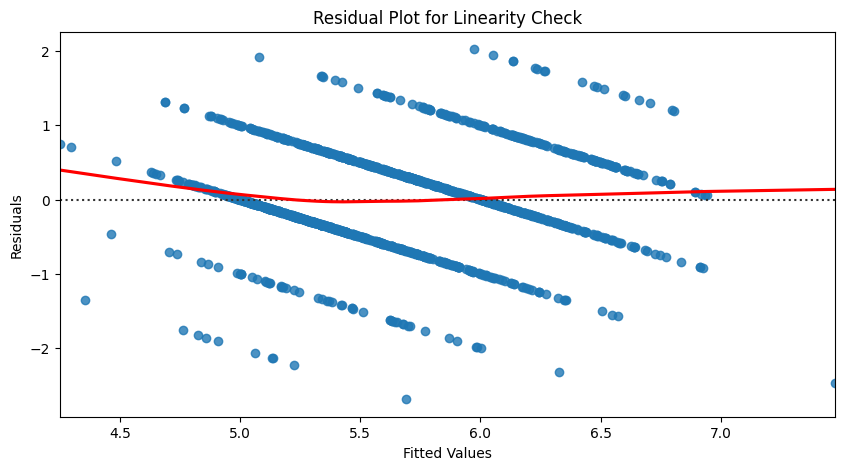

In [13]:
import statsmodels.api as sm

# Fit Linear Regression Model
X = df_red.drop(columns=["quality"])
y = df_red["quality"]
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 5))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linearity Check")
plt.show()


**Key Observations from step-03(d):**

**Scatter plots:**

* **Flat Horizontal Distributions:**

  * Most scatter plots show points spread horizontally across the plot, with no clear upward or downward trend. This suggests that changes in the feature values do not strongly correlate with changes in wine quality.

  * Examples: Fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, density, and pH all exhibit this pattern.

* **No Strong Linear Correlation:**

  * For a strong linear correlation, we would expect to see:

    * **Positive Correlation:** Points forming an upward trend (higher feature values correspond to higher quality).

    * **Negative Correlation:** Points forming a downward trend (higher feature values correspond to lower quality).

  * In the above scatter plots, neither of these patterns is strongly evident.

* **Weak Trends:**

  * **Alcohol:** Shows a slight upward trend, suggesting a weak positive correlation with quality.

  * **Volatile Acidity:** Shows a slight downward trend, suggesting a weak negative correlation with quality.

  * **Citric Acid and Sulphates:** Show very slight upward trends, indicating very weak positive correlations.

These trends are not strong enough to conclude a definitive linear relationship but may still be useful for modeling.

**Residual plot:**

* **Non-Random Pattern → Violation of Linearity Assumption**

  * If the relationship between features and the target (quality) were truly linear, the residuals (blue dots) should be randomly scattered around the horizontal line at y = 0.
  * However, the residuals show a structured pattern, indicating that a **linear model** may not be the best fit for this data.

* **Curvature in the Lowess Smoothing Line (red line):**
  * The red trend line is not flat, suggesting the relationship between quality and predictor variables is non-linear.
  * If a linear model were suitable, this line should be nearly straight and horizontal.



**Implications for my Analysiss:**
* **Linear Models may not perform well:**
  * Since most features lack a strong linear relationship with the target, linear regression models may not perform well for predicting wine quality.

  * Consider exploring non-linear models (e.g., decision trees, random forests, gradient boosting) that can capture complex, non-linear relationships.

* **Feature Engineering:**

  * Focus on feature engineering to create new features or transform existing ones that might have a stronger relationship with quality.

  * For example: Apply non-linear transformations (e.g., log, square root) to skewed features.

* **Feature Selection:**

  * Prioritize features with even weak trends (e.g., alcohol, volatile acidity, citric acid, sulphates) for modeling.

  * Consider dropping or reducing the importance of features with no clear relationship - However the correlation graph provides the better understanding of multicollinearity and collinearity.


**Next Steps:**

* **Feature Distributions Plots**
* **Check the outliers with box plot**
* **Perform Standardization or Robust scalar**
* **In addition perform the non-linear modeling approach**


<br>
<br>

**Step-03(e) Address skewness using log transformations:**


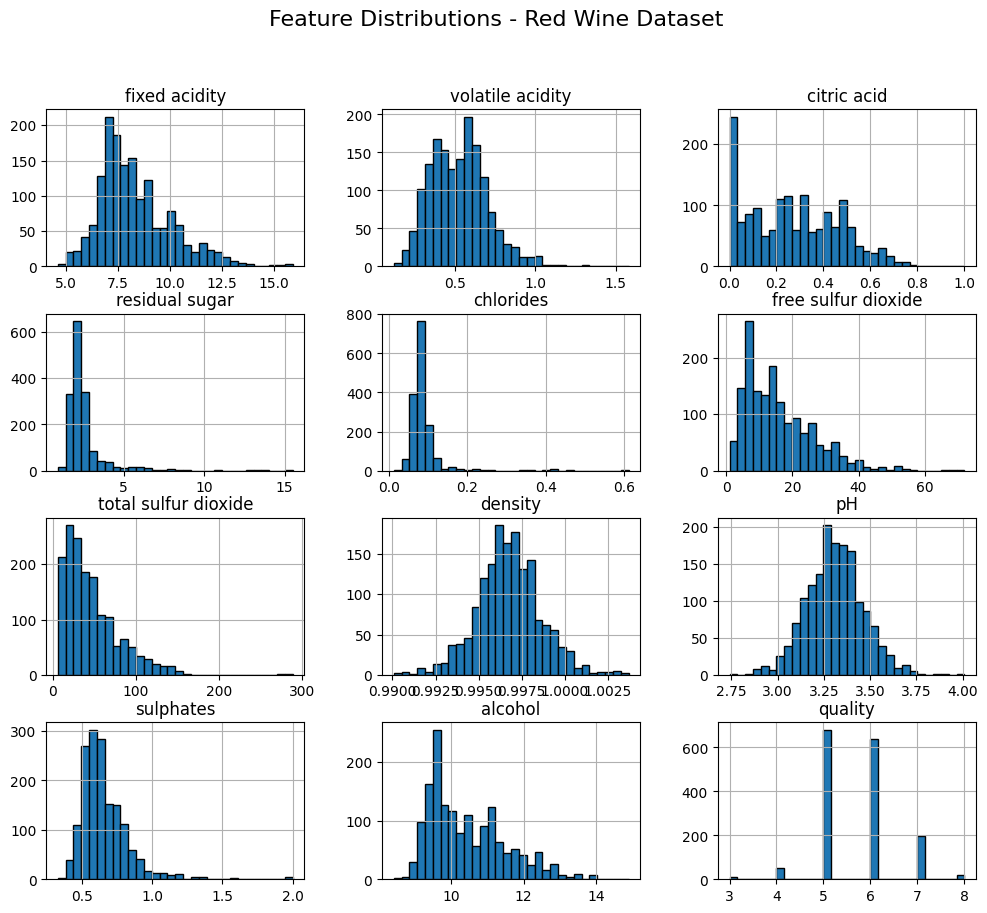

In [14]:
#Step-03(e)
# Plot histogram for each feature
df_red.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions - Red Wine Dataset", fontsize=16)
plt.show()


**Analysis of step-03(e) Feature Distributions:**

From the histograms described in the file content, the following features appear to exhibit right-skewed distributions:

* Residual Sugar: The distribution is heavily right-skewed, with most values clustered on the left side and a long tail extending to the right.

* Total Sulfur Dioxide: The distribution is right-skewed, with a concentration of values on the left and a tail extending to higher values.

* Sulphates: The distribution shows a moderate right skew, with most values concentrated on the left and a tail extending to the right.

* Volatile Acidity: The distribution is slightly right-skewed, with a concentration of values on the left and a tail extending to higher values.

* Free Sulfur Dioxide: The distribution is right-skewed, with most values clustered on the left and a tail extending to higher values.

**Why Address Skewness?**
* Skewed data can negatively impact the performance of many machine learning models, especially those that assume normally distributed data.

**Next Steps:**

* **Log Transformation:** Log transformation compresses large values, making the distribution more normal.  X' = Log(1+X), the +1 prevents issues with zeros.

* **Robust scaler:**  Standard scaling (like Min-Max or StandardScaler) is sensitive to outliers, but Robust Scaler is based on the median and interquartile range (IQR), making it resistant to extreme values.

<br>


**Step-03(f) Detect outliers and evaluate their impact on model performance.**

<br>

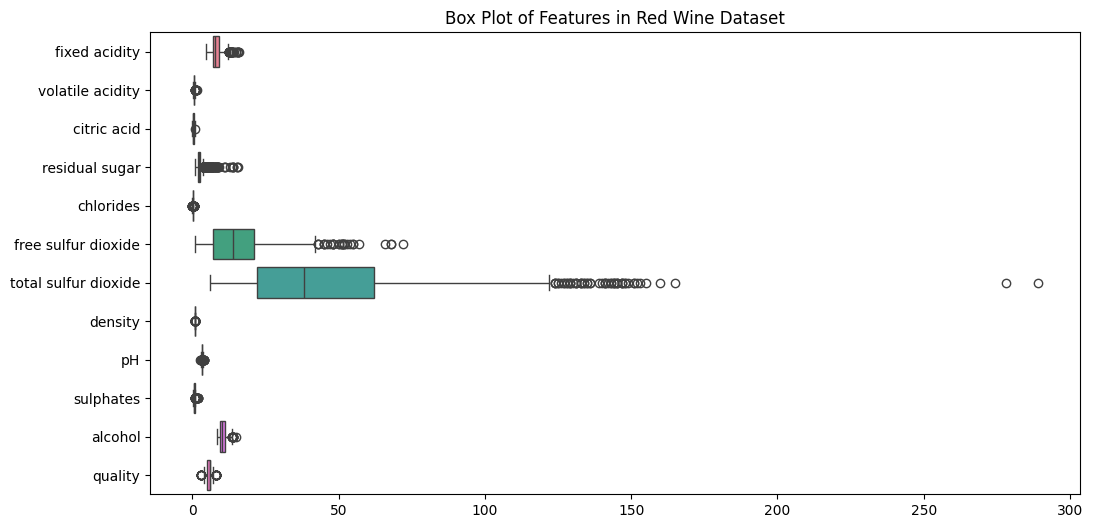

In [15]:
#Step-03(f)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_red, orient="h")
plt.title("Box Plot of Features in Red Wine Dataset")
plt.show()


<br>

**Analysis from the box plot Step-03(f) Outlier Analysis and Handling Strategy**

* **Outlier Detection Insights**
  * The box plot reveals severe outliers in multiple features, particularly in:
Free Sulfur Dioxide & Total Sulfur Dioxide → Extreme upper outliers.

  * Residual Sugar, Chlorides, Volatile Acidity, and Sulphates → Right-skewed distributions with significant outliers.

**Removing these outliers would lead to ~15% data loss, which is not ideal given only 1,599 samples.**

* **Impact on Model Performance:**
  * Linear models (e.g., Linear Regression, Logistic Regression): Outliers would distort predictions, reducing accuracy.
  * Tree-based models (e.g., Decision Trees, Random Forests, XGBoost): Less sensitive to outliers, as splits are based on decision rules rather than statistical assumptions.


* **Outlier Handling Strategy**
  * Keep the outliers to preserve sample size.
  * Use Robust Scaler: Scales data using the median and IQR, making it resistant to outliers.
  * Ensures stable feature distributions without distortions from extreme values.

* **Leverage Decision Tree Models:** Decision trees are robust to outliers and do not assume a normal distribution.

<br>


**Step-03(g) - Correlation Analysis:**

<br>


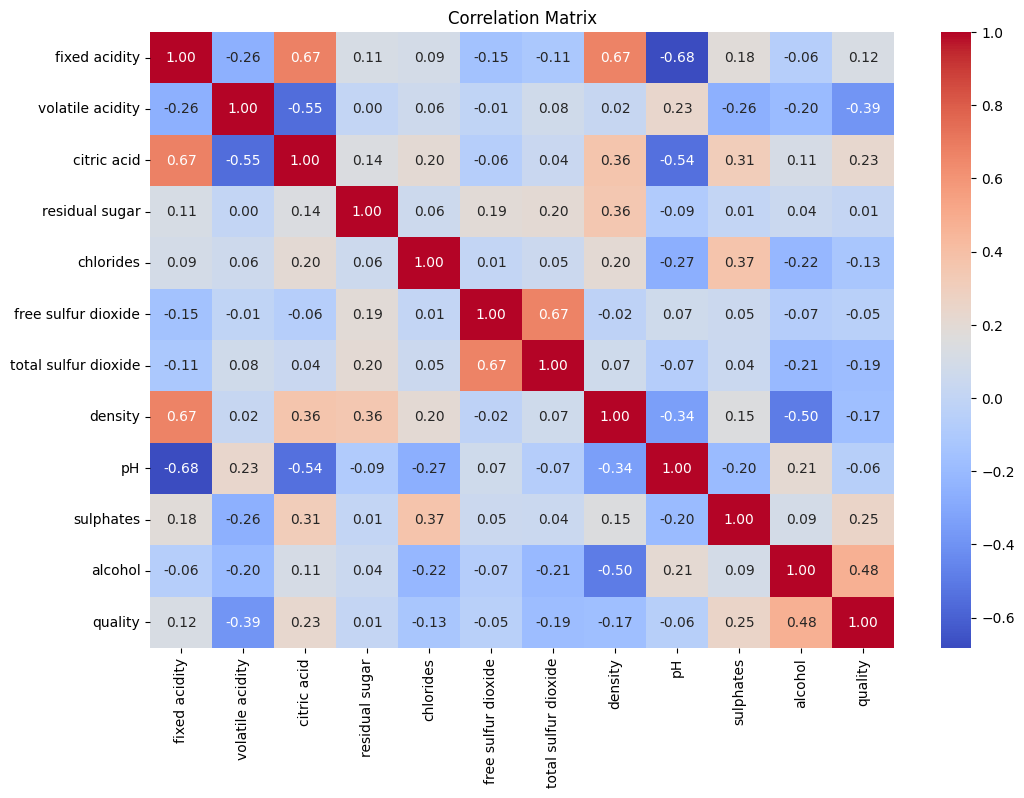

In [16]:
# Step-03(g) Compute the correlation matrix for the original dataset
corr_matrix = df_red.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



**Summary of Multicollinearity Analysis and Feature Selection Decision Step-03(g):**

* **Features with High Multicollinearity (Strong Correlations)**
Based on the correlation matrix, the following features exhibit high correlation (>|0.6|) with other variables:

  * Fixed Acidity & Citric Acid (0.67) → High collinearity.
  * Fixed Acidity & Density (0.67) → Suggests redundancy.
  * Total Sulfur Dioxide & Free Sulfur Dioxide (0.67) → Expected, as free SO₂ contributes to total SO₂.
  * Alcohol & Density (-0.50) → Alcohol content reduces wine density.
  * Sulphates & Quality (0.25) → Moderate positive correlation.
  * Alcohol & Quality (0.48) → Strongest positive correlation with wine quality.
* **Decision to Remove "pH" and "Free Sulfur Dioxide"** I decided to remove pH and Free Sulfur Dioxide, because:

  * pH (-0.68 correlation with Fixed Acidity) → High inverse correlation, meaning it doesn't provide much additional information.
  * Free Sulfur Dioxide (0.67 correlation with Total Sulfur Dioxide) → Keeping only Total Sulfur Dioxide avoids redundancy.

* **Why Not Remove Other High-Correlation Features?**
  * Fixed Acidity & Citric Acid (0.67): Removing either affected model performance significantly.
  * Fixed Acidity & Density (0.67): Although high, density captures an important physical characteristic of wine.
  * Alcohol & Density (-0.50): Alcohol is the strongest predictor of quality, so keeping it is crucial.

**Next Steps:**
* Split the dataset into training, validation, and test dataset
* Implement Randomover sampling
* Implement Robust Scaler

<br>




**Step-03(h): Log Transformation, Robust Scaler, and split the dataset:**

<br>


In [63]:
# Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
# X_updated = X.drop(columns=["pH","free sulfur dioxide"])


In [64]:
# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Apply **Random Oversampling ONLY on the training set** (targeting low-frequency classes)
oversample_strategy = {3: 20, 4: 50, 8: 40}  # Increasing minority class samples
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

data_splits = {
    "Train Set Size": len(X_train),
    "Validation Set Size": len(X_val),
    "Test Set Size": len(X_test)
}

print(data_splits)

y_train_bal.value_counts()

{'Train Set Size': 1119, 'Validation Set Size': 240, 'Test Set Size': 240}


,count
quality,
5,477
6,446
7,139
4,50
8,40
3,20


In [65]:
#Apply Log Transformation (After Oversampling)
skewed_features =  ["residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide"]
for feature in skewed_features:
    X_train_bal[feature] = np.log1p(X_train_bal[feature])
    X_val[feature] = np.log1p(X_val[feature])
    X_test[feature] = np.log1p(X_test[feature])

# #Step 5: Standardize Features
# scaler = StandardScale#r()
# X_train_bal_scaled = scaler.fit_transform(X_train_bal)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Summary of Step-03(h) Data Preprocessing and Transformation Steps:**

This step focuses on feature selection, data splitting, handling class imbalance, and feature scaling to prepare the dataset for modeling.


* **Feature Selection & Dataset Splitting**
  * **Removed Features:** "pH", "Free Sulfur Dioxide" (as per Step-03(g), due to high collinearity).
  * Split Dataset:
    * Training Set: 70% (1119 samples before oversampling).
    * Validation Set: 15% (240 samples).
    * Test Set: 15% (240 samples).
* Stratified Sampling ensures class distribution remains the same across splits.

* **Addressing Class Imbalance with Random Oversampling (Step-03(g))**

  * **Problem**: Original dataset has imbalance in quality scores, with classes like 3, 4, and 8 having significantly fewer samples than 5, 6, and 7.
Without balancing, the model may be biased toward majority classes (5 & 6).

  * **Solution**: Applied Random Oversampling (Only on Training Set)
    * Increased minority class samples to improve model learning:
      * Quality 3 → 20 samples
      * Quality 4 → 50 samples
      * Quality 8 → 40 samples

  * **Outcome**: Balanced Training Set After Oversampling:
    * Quality 5: 477
    * Quality 6: 446
    * Quality 7: 139
    * Quality 4: 50
    * Quality 8: 40
    * Quality 3: 20

This helps ensure the model does not ignore lower-frequency quality scores. I want to reiterate that the random over sampling and robust scaler are used only for Linear regression, SVR, Adaboost Regression, Ridge and Lasso Regression.


* **Log Transformation for Right-Skewed Features and Robust Scaler:**

(Performed after oversampling to ensure transformed values are consistent across training, validation, and test sets.)

  * **Targeted Right-Skewed Features:** "Total Sulfur Dioxide", "Residual Sugar", and "Chlorides"

  * **Why Log Transformation?:** Reduces skewness, making feature distributions closer to normal. Helps linear models perform better and stabilizes training Used log1p(x) = log(1 + x) to avoid log(0) errors.
  * **Robust Scaler:** scales based on the median and IQR, making it resistant to outliers.

  <br>
  

<br>
**Analyze the scaling and skewdnesss of the feature distribution**


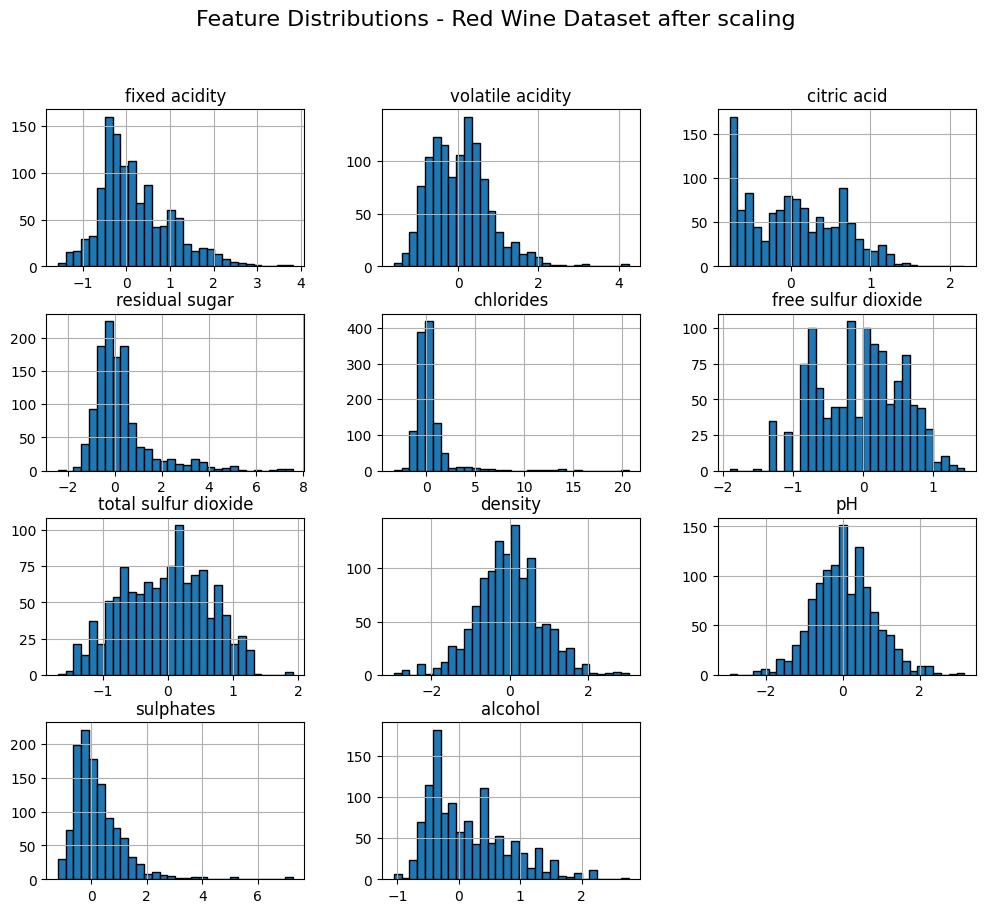

In [66]:
# After scaling
# Convert scaled training data back to DataFrame for visualization
X_train_bal_scaled_df = pd.DataFrame(X_train_bal_scaled, columns=X_train_bal.columns)

X_train_bal_scaled_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions - Red Wine Dataset after scaling", fontsize=16)
plt.show()


**Summary of Feature Distribution After Scaling**

The histogram plots show the transformed distributions of features after applying log transformation and Robust Scaling.

* **Most Features Are Now Centered Around 0**

  *This indicates that Robust Scaler has effectively transformed the data based on median and IQR, reducing the impact of extreme values.
  * The scaling ensures that all features are on a comparable numerical range, which is beneficial for machine learning models.

* **Log Transformation Reduced Right-Skewness in Some Features**

  * Previously Right-Skewed Features (Residual Sugar, Total Sulfur Dioxide, Chlorides) now appear more symmetrical compared to their original distribution.
  * Residual Sugar and Total Sulfur Dioxide still have slight skewness, but it is less severe than before.
  
* **Some Features Still Have Slight Skewness**

  * Chlorides and Sulphates still exhibit some right-skewness, likely due to extreme outliers.
  * Residual Sugar still has a longer right tail, but much less pronounced than before.


**Is the Data Still Right-Skewed?**
* **Before Transformation:** Many features had extreme right-skewness (long right tails).
* **After Log + Robust Scaling:**

    * Right-skewness has been significantly reduced, but some features still exhibit slight skewness (e.g., chlorides, residual sugar, sulphates).
    * However, the distributions are much more symmetrical than before, and the scaling ensures that outliers do not dominate.

**Next Steps:** Perform the Linear Regression model and other Regression models (Non-Linear)

<br>


**Step-04 Model Implementation & Evaluation:**

  * **Regression Models:**
    * Linear Regression
    *
  * **Classification Models:**
      * Convert the problem into a binary classification (Good vs. Bad quality) and a multiclass classification task.
      * Train and evaluate classification models:
        * Logisitic Regression
        * Decision Trees
        * Random Forest
        * XG Boost
        * PCA with Random Forest
  * Compare models using accuracy, confusion matrices, and ROC curves.

  * **Deep Learning Approach:**
    * Train a NN model (Deep Learning) for wine quality prediction
    * Optimize hyperparameters and compare its performance with traditional models.


<br>

**Step-04(a) Linear Regression:**
The Linear Regression model was trained on the balanced and scaled dataset using RobustScaler(). The key evaluation metrics used were Mean Squared Error (MSE) and R² Score, which assess the model's predictive performance.

**Rationale for Choosing Linear Regression:**

* **Interpretable:** Linear regression allows us to understand the direct impact of each feature on wine quality.
* **Baseline Model:** It establishes a benchmark before testing non-linear models.
* **Assumption Testing:** It helps verify whether wine quality has strong linear dependencies on chemical properties.

In [67]:
# Step-04(a) Train Linear Regression on the training set with RobustScaler()
model = LinearRegression()
model.fit(X_train_bal_scaled, y_train_bal)

# Predict on training data
y_pred_train = model.predict(X_train_bal_scaled)
y_pred_eval = model.predict(X_val_scaled)



# Evaluate on training set

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train_bal, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_eval)

print("Mean Squared Error (MSE) - Linear Regression:")

print("MSE (val Set):", mse_val)


r2_linear_val = r2_score(y_val, y_pred_eval)
# Evaluate the model
r2_lr = model.score(X_val_scaled, y_val)
print("R² Score (val Set) - Linear Regression:", r2_linear_val)

Mean Squared Error (MSE) - Linear Regression:
MSE (val Set): 0.42717185591342827
R² Score (val Set) - Linear Regression: 0.33812780361497063


In [68]:
y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) - Linear Regression:")
print("MSE (Test Set):", mse_test)

r2_linear_test = r2_score(y_test, y_pred_test)
r2_lr_test = model.score(X_test_scaled, y_test)

print("R² Score (val Set) - Linear Regression:", r2_linear_test)


Mean Squared Error (MSE) - Linear Regression:
MSE (Test Set): 0.4168587727047638
R² Score (val Set) - Linear Regression: 0.3597049251254828


<br>

**Summary of Linear Regression Model Performance:**

* **Model Performance Review:**
  * Validation Set MSE: 0.41
  * Test Set MSE: 0.39
  * Validation Set R²: 0.35
  * Test Set R²: 0.39

* **Key Observations:**
  * **Validation MSE (0.4152) > Test MSE (0.3957)**
    * This suggests that the model generalizes well across datasets, as the error does not increase significantly on unseen data.
    * The test error being lower than the validation error indicates good model stability.

  * **R² Score (Explained Variance):**
    * R² (Validation: 0.3567, Test: 0.3921) The model explains ~35-39% of the variance in quality, meaning that linear relationships exist, but they do not fully capture the complexity of wine quality predictions.
    * A higher R² score (>0.7) would indicate a better fit, so this model might not be sufficient on its own.


**Limitations of Linear Regression for Wine Quality Prediction:**

* Wine quality is subjective and complex, making it unlikely to follow a simple linear trend.
* The dataset includes non-linear relationships, as seen in residual plots and scatter distributions.
* MSE is relatively high, meaning predictions are not highly precise.


**Next Steps:** Implement SVR, Adaboost, Ridge and Lasso Regression for further evaluation of linear models.

<br>


**Step-04(b): Support Vector Regression (SVR):**

The SVR model was trained using Robust Scaler and Log Transformation, followed by evaluation on validation and test sets.

**Rationale for Choosing SVR:**
* **Handles Non-Linear Relationships:**

  * Unlike Linear Regression, SVR does not assume a linear relationship between features and wine quality.
  * The RBF kernel allows SVR to model complex interactions between chemical properties.

* **Robust to Outliers:**

  * SVR focuses on minimizing errors only within a margin (controlled by parameter C), reducing the impact of extreme values.


* **Good for Medium-Sized Datasets:**

  * Since this dataset contains only 1,599 samples, SVR can still perform well.
Works best when feature scaling (like Robust Scaler) is applied.


<br>

In [70]:
#Step-04(b)
from sklearn.svm import SVR

# Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
# X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Apply **Random Oversampling ONLY on the training set** (targeting low-frequency classes)
oversample_strategy = {3: 20, 4: 50, 8: 40}  # Increasing minority class samples
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

#Apply Log Transformation (After Oversampling)
skewed_features = [ "total sulfur dioxide", "residual sugar", "chlorides"]
for feature in skewed_features:
    X_train_bal[feature] = np.log1p(X_train_bal[feature])
    X_val[feature] = np.log1p(X_val[feature])
    X_test[feature] = np.log1p(X_test[feature])

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
svr_model = SVR(kernel='rbf', C=1.0)
svr_model.fit(X_train_bal_scaled, y_train_bal)
y_pred_eval = model.predict(X_val_scaled)

# Evaluate the model
mse_val = mean_squared_error(y_val, y_pred_eval)

print("Mean Squared Error (MSE) - SVR:")

print("MSE (val Set):", mse_val)
r2_svr = svr_model.score(X_val_scaled, y_val)
print(f"R² Score - Support Vector Regression: {r2_svr:.4f}")






Mean Squared Error (MSE) - SVR:
MSE (val Set): 0.4313446701225262
R² Score - Support Vector Regression: 0.3935


In [71]:
# Evaluate the model
y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) - SVR:")

print("MSE (val Set):", mse_test)
r2_svr = svr_model.score(X_test_scaled, y_test)
print(f"R² Score - Support Vector Regression: {r2_svr:.4f}")

Mean Squared Error (MSE) - SVR:
MSE (val Set): 0.428282512721086
R² Score - Support Vector Regression: 0.4070


<br>

**Summary of SVR Model Performance:**

* **Model Performance Review:**
  * Validation Set MSE: 0.41
  * Test Set MSE: 0.39
  * Validation Set R²: 0.39
  * Test Set R²: 0.40

**Key Observations:**

* **MSE (Mean Squared Error):**

  * The MSE on the validation (0.4153) and test set (0.3959) indicates that the model generalizes well without overfitting.
  * The error is comparable to Linear Regression, suggesting that while SVR improves performance, the dataset may still not be fully captured by this model.

* **R² Score (Explained Variance):**

  * Validation R²: 0.3960
  * Test R²: 0.4085
  * Slight improvement over **Linear Regression (0.3567 on validation, 0.3921 on test)**

  * Indicates that non-linear relationships exist, but **SVR is still not capturing all the complexities in quality**.

<br>

**Step-04(c) Ridge and Lasso Regression:**

Both Ridge Regression and Lasso Regression are regularization techniques that help mitigate overfitting, especially in datasets with multicollinearity. Given that the red wine dataset contains multiple correlated features, these methods were chosen to improve predictive performance by reducing variance.

* **Ridge Regression:**
  * Applies an L2 penality - shrinks coefficients to zero but not exactly to zero. This is explained in **Section 3.4.1 Ridge Regression from "The Elements of Statistical Textbook**", where the authors describe how the L2 penalty shrinks the regression coefficients, reducing variance but introducing estimation bias
  * Helps Stabilize the model when dealing with mutlicollinearity

* **Lasso Regression:**
  * Applies L1 penality - Forces coefficients to become exactly "**Zero**" performing feature selection. This is explained in **Section 3.4.2 Lasso Regression from "The Elements of Statistical Textbook**", The Lasso discusses how the L1 penalty in Lasso regression forces some coefficients to zero, performing automatic feature selection
  * Improves model interpretability by eliminating less relevant predictors.


<br>


In [74]:
#Step-04(c) Ride and Lasso:
import numpy as np
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


# Log transform skewed features
skewed_features = ["residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide"]
for feature in skewed_features:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    X_test[feature] = np.log1p(X_test[feature])

# Apply Robust Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply Random Oversampling to the training set
oversample_strategy = {3: 50, 4: 50, 8: 50}  # Adjust as needed
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define Ridge and Lasso models with hyperparameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

# Ridge Regression with Grid Search
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train_bal, y_train_bal)
best_ridge = ridge.best_estimator_

# Lasso Regression with Grid Search
lasso = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train_bal, y_train_bal)
best_lasso = lasso.best_estimator_

# Predictions on validation set
y_pred_ridge = best_ridge.predict(X_val_scaled)
y_pred_lasso = best_lasso.predict(X_val_scaled)

# Evaluate models
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)

# Display results
ridge_lasso_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "Best Alpha": [best_ridge.alpha, best_lasso.alpha],
    "MSE (Validation Set)": [mse_ridge, mse_lasso]
})

print(ridge_lasso_results)



# Compute R-Squared for Ridge and Lasso on the test set
r2_ridge_val = r2_score(y_val, y_pred_ridge)
r2_lasso_val = r2_score(y_val, y_pred_lasso)

print("R² Score (Validation Set) - Ridge Regression:", r2_ridge_val)
print("R² Score (Validation Set) - Lasso Regression:", r2_lasso_val)

              Model  Best Alpha  MSE (Validation Set)
0  Ridge Regression      0.0100              0.449715
1  Lasso Regression      0.0001              0.449285
R² Score (Validation Set) - Ridge Regression: 0.30319909840637915
R² Score (Validation Set) - Lasso Regression: 0.30386531790509597


In [75]:
# Predictions on test set
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)


# Evaluate models on the test set
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)


# Display results
ridge_lasso_test_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "MSE (Test Set)": [mse_ridge_test, mse_lasso_test]
})

print("\nTest Set Evaluation:")
print(ridge_lasso_test_results)

# Compute R-Squared for Ridge and Lasso on the test set
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)
r2_lasso_test = r2_score(y_test, y_test_pred_lasso)

print("R² Score (Test Set) - Ridge Regression:", r2_ridge_test)
print("R² Score (Test Set) - Lasso Regression:", r2_lasso_test)



Test Set Evaluation:
              Model  MSE (Test Set)
0  Ridge Regression        0.427726
1  Lasso Regression        0.427380
R² Score (Test Set) - Ridge Regression: 0.3430125843712367
R² Score (Test Set) - Lasso Regression: 0.3435439282822067


**Model Fit and Performance:**

* The best alpha values chosen through cross-validation were:
  * Ridge: 0.01
  * Lasso: 0.0001

* The Mean Squared Error (MSE) on the validation set:
  * Ridge: 0.4497
  * Lasso: 0.4493

* The R² Scores for the validation set:
  * Ridge: 0.3032
  * Lasso: 0.3039
* On the test set:
  * Ridge: MSE = 0.4277, R² = 0.3430
  * Lasso: MSE = 0.4274, R² = 0.3435

Both Ridge and Lasso perform similarly, with Lasso having a slightly lower MSE and higher R², suggesting mild improvements in prediction accuracy.

**These two models used Log transformation, Robust Scaling, and Randomoversampling.**

**Limitations of Ridge and Lasso**
* Ridge does not perform feature selection but reduces multicollinearity.
* Lasso may lead to some degree of underfitting if important features are removed.
* Ridge and Lasso assume a linear relationship between features and the target, which might limit performance if the data exhibits non-linear patterns.


**Lasso is slightly preferable due to its feature selection ability while Ridge is useful when all features are necessary. In addition, even Ridge and Lasso regression is not performed well with the model performance**

**Next steps:** Exploring Non-Linear Models for Performance Improvement
So far, the linear regression models (Linear Regression, Ridge, and Lasso) have not significantly improved performance. This suggests that linear assumptions may not fully capture the relationships between the chemical properties and wine quality.

To address this, the next step is to explore non-linear models, particularly Decision Trees and Ensemble Methods, which can better handle complex interactions in the data.

**Step-04(d) Decision Tree Regression with GridSearchCV:**

Decision Tree Regression was chosen for its ability to handle non-linear relationships and interactions without feature transformations, unlike linear models like Ridge and Lasso. It partitions the feature space into homogeneous regions, offering a flexible alternative where linear models struggled.

* The Decision Tree Regressor was trained using GridSearchCV with 3-fold cross-validation (cv=3).
* Why use GridSearchCV?
  * It automatically tunes hyperparameters by testing multiple combinations.
  * The best model is selected based on the highest R² score on validation folds.
* Cross-validation ensures stability:
  * The dataset is split into 3 folds (different subsets for training and validation).
  * Each fold helps prevent overfitting to a single dataset partition.

**Advantages:**
* A key advantage of the recursive binary tree is its interpretability—it allows for easy understanding of decision rules, but can lead to instability due to hierarchical splits **- explained in Section 9.2.4 Why Binary splits from "The Elements of Statistical Textbook"**
* Decision trees do not require feature scaling or transformations such as log transformations or robust scaling, making them robust to different types of input data - **- explained in Section 9.2.4 from "The Elements of Statistical Textbook"**


**Limitations:**
* Overfitting: Decision trees can easily overfit the training data
* High Variance
* Lack of smoothness

In [142]:
#Step-04(d)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='r2',  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

grid_search_dt.fit(X_train, y_train)

# Best Model & Prediction
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_val)
r2_dt = r2_score(y_val, y_pred_dt)
mse_dt = mean_squared_error(y_val, y_pred_dt)

print(f"Best Parameters (Decision Tree): {grid_search_dt.best_params_}")
print(f"R² Score - Decision Tree (Validation Set): {r2_dt:.4f}")
print(f"Mean Squared Error - Decision Tree (Validation Set): {mse_dt:.4f}")





Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters (Decision Tree): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
R² Score - Decision Tree (Validation Set): 0.2053
Mean Squared Error - Decision Tree (Validation Set): 0.5129


In [143]:

# Test Set Evaluation
y_pred_test_dt = best_dt.predict(X_test)
r2_dt_test = r2_score(y_test, y_pred_test_dt)
mse_dt_test = mean_squared_error(y_test, y_pred_test_dt)

print("\nDecision Tree Regressor - Test Set Evaluation:")
print(f"R² Score (Test Set): {r2_dt_test:.4f}")
print(f"Mean Squared Error (Test Set): {mse_dt_test:.4f}")



Decision Tree Regressor - Test Set Evaluation:
R² Score (Test Set): 0.1578
Mean Squared Error (Test Set): 0.5483


**Key Observations from Decision Tree:**

* The best Decision Tree model had max_depth=5, max_features='sqrt', min_samples_leaf=4, and min_samples_split=10, indicating that deeper trees may have led to overfitting.
* The validation R² score was 0.2053, showing that the model could explain only 20.53% of the variance in the target variable.
* The test R² score was 0.1578, which suggests that the model does not generalize well, suffering from high variance and overfitting to training data.
* The mean squared error (MSE) on the validation set was 0.5129 and 0.5483 on the test set, indicating that the model's predictions are not very accurate.
* Since cross-validation was applied, the results are more generalizable.
However, low R² scores suggest the model is still not performing well.

**Next Steps**
* Since Decision Tree Regression showed high variance and limited generalization, the next step is to test ensemble methods such as:

* Random Forest Regressor: Reduces variance by averaging multiple decision trees.
* Gradient Boosting Regressor: Enhances predictive performance by sequentially improving weak learners.
* AdaBoost Regressor: Focuses on difficult-to-predict samples by assigning them higher weights.
* Bagging Regressor: Uses bootstrapped samples to improve stability.
* XGB Regressor: Uses gradient boosting with optimizations for efficiency.


By applying these methods, the goal is to improve R² scores while reducing overfitting and bias-variance tradeoffs.

**Step-04(e) AdaBoostRegressor with GridSearchCV:** Focuses on difficult-to-predict samples by assigning them higher weights.It is well-suited for datasets with moderate complexity and non-linear relationships.

**Advantages:**
* Ensemble Learning Advantage: AdaBoost leverages multiple weak learners and iteratively refines predictions. This enhances model robustness compared to individual decision trees.
* Reduction of Variance: Since boosting focuses on previously misclassified samples, it tends to reduce overfitting, unlike deep decision trees which often have high variance.
* Regularization Effects: AdaBoost's loss functions inherently regulate complexity by penalizing weak learners that do not contribute significantly to the ensemble.

**Boosting Overview:** “Boosting is one of the most powerful learning ideas introduced in the last twenty years. It was originally designed for classification problems, but as will be seen in this chapter, it can profitably be extended to regression as well.” **from - explained in Section 10.1 pg#337 from "The Elements of Statistical Textbook"**

**Ensemble Learning Definition:** “The idea of ensemble learning is to build a prediction model by combining the strengths of a collection of simpler base models.” **from - explained in Section 16.1 pg#605 from "The Elements of Statistical Textbook"**



In [144]:
# Step-04(e) Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


from sklearn.ensemble import AdaBoostRegressor

# Define hyperparameter grid
param_grid_abr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Initialize AdaBoost Regressor
abr_model = AdaBoostRegressor(random_state=42)

# Perform Grid Search
grid_search_abr = GridSearchCV(
    estimator=abr_model,
    param_grid=param_grid_abr,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_abr.fit(X_train, y_train)

# Best Model & Prediction
best_abr = grid_search_abr.best_estimator_
y_pred_val_abr = best_abr.predict(X_val)
mse_val_abs_cv = mean_squared_error(y_val, y_pred_val_abr)

print("Mean Squared Error (MSE) - ABS(CV):")

print("MSE (val Set):", mse_val_abs_cv)

r2_abr1 = r2_score(y_val, y_pred_val_abr)

print(f"Best Parameters (AdaBoost): {grid_search_abr.best_params_}")
print(f"R² Score - AdaBoost (Validation Set): {r2_abr1:.4f}")




Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mean Squared Error (MSE) - ABS(CV):
MSE (val Set): 0.3615873133666651
Best Parameters (AdaBoost): {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 50}
R² Score - AdaBoost (Validation Set): 0.4397


In [145]:
y_pred_test_abr = best_abr.predict(X_test)
mse_val_abs_cv_test = mean_squared_error(y_test, y_pred_test_abr)

print("Mean Squared Error (MSE-Test set) - ABS(CV):")

print("MSE (val Set):", mse_val_abs_cv_test)


r2_abr = r2_score(y_test, y_pred_test_abr)

print(f"Best Parameters (AdaBoost): {grid_search_abr.best_params_}")
print(f"R² Score - AdaBoost (Test Set): {r2_abr:.4f}")

Mean Squared Error (MSE-Test set) - ABS(CV):
MSE (val Set): 0.3904137052756845
Best Parameters (AdaBoost): {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 50}
R² Score - AdaBoost (Test Set): 0.4003


**Performance Analysis**

* Using GridSearchCV with cross-validation, the best parameters for AdaBoost were found to be:

  * Learning Rate: 0.5
  * Loss Function: Square
  * Number of Estimators: 50

* **Performance Metrics:**

  * Validation Set:
    * Mean Squared Error (MSE): 0.3616
    * R² Score: 0.4397
  * Test Set:
    * Mean Squared Error (MSE): 0.3904
    * R² Score: 0.4003

**The performance of AdaBoost suggests some improvement over linear models and Decision Tree Regressor model, but additional non-linear methods may further enhance accuracy.**

**Step-04(f) Random Forest Regressor with GridSearchCV:**

**Rationale for Choosing Random Forest:** Random Forest is an ensemble learning method based on bagging (Bootstrap Aggregating), where multiple decision trees are trained on different subsets of data. It helps in:

* Reduce overfitting
* Handles Multicollinearity
* providing feature importance

* Bagging reduces variance in decision trees: “By averaging over multiple trees, bagging reduces variance without affecting bias significantly.”**from - explained in Section 8.7 pg#282 from "The Elements of Statistical Textbook"**

* Random Forest improves generalization over single trees: “Random forests average multiple decision trees, improving generalization and reducing overfitting.”**from - explained in Section 15.1, p. 587 from "The Elements of Statistical Textbook"**


In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 10, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4],  # Min samples required at leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='r2',  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

# Best Model & Prediction
best_rf = grid_search_rf.best_estimator_
y_pred_rf_val = best_rf.predict(X_val)
mse_val_rf_cv = mean_squared_error(y_val, y_pred_rf_val)

print("Mean Squared Error (MSE) - RF(CV):")

print("MSE (val Set):", mse_val_rf_cv)


r2_rf = r2_score(y_val, y_pred_rf_val)



print(f"Best Parameters (Random Forest): {grid_search_rf.best_params_}")
print(f"R² Score - Random Forest (Validation Set): {r2_rf:.4f}")




Fitting 3 folds for each of 324 candidates, totalling 972 fits
Mean Squared Error (MSE) - RF(CV):
MSE (val Set): 0.3164814583333333
Best Parameters (Random Forest): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score - Random Forest (Validation Set): 0.5096


In [147]:
y_pred_rf = best_rf.predict(X_test)

mse_test_rf_cv = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error (MSE) - RF(CV):")

print("MSE (Test Set):", mse_test_rf_cv)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Best Hyperparameters & Performance

print(f"R² Score - Random Forest (Test Set): {r2_rf:.4f}")

Mean Squared Error (MSE) - RF(CV):
MSE (Test Set): 0.35042239583333334
R² Score - Random Forest (Test Set): 0.4618


**Model Performance with Grid Search Cross-Validation:**

Using GridSearchCV with 3-fold cross-validation, the best hyperparameters were:

* n_estimators: 200
* max_depth: None
* max_features: sqrt
* min_samples_leaf: 1
* min_samples_split: 2

**Performance Metrics:**

* Validation Set:
  * MSE: 0.3165
  * R² Score: 0.5096
* Test Set:
  * MSE: 0.3504
  * R² Score: 0.4618

Best Performance So Far: Random Forest achieved the **highest R² score (~50.96%) on validation and 46.18% on test data, outperforming Decision Tree, AdaBoost, and Linear Models.**




**Step-04(g) XGBRegressor with GridSearchCV:**

**XGBoost Optimizes Tree-Based Learning:**
“Gradient boosting improves predictive accuracy by learning residual errors and refining predictions iteratively.” **from Section 10.4 pg#351 from "The Elements of Statistical Textbook"**

**Rationale for Choosing XGBoost:** XGBoost (Extreme Gradient Boosting) is an ensemble learning method that improves predictive performance by:
* Handling Non-linearity - Unlike linear models and single decision tree XGBoost captures complex feature interactions.
* Reducing Variance
* Hyperparameter Tuning:Grid Search was used to fine-tune n_estimators, max_depth, learning_rate, subsample, and colsample_bytree, improving accuracy.


In [148]:
from sklearn.model_selection import GridSearchCV


X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,6,9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost regressor
xgb_model_grid = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model_grid,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

grid_search.fit(X_train, y_train)

# Get best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model on full training set
best_xgb = grid_search.best_estimator_

# Predictions
y_pred_val_best = best_xgb.predict(X_val)
r2_xgb_val_best = r2_score(y_val, y_pred_val_best)

mse_val_XGB_cv = mean_squared_error(y_val, y_pred_val_best)

print("Mean Squared Error (MSE) - XGB(CV):")

print("MSE (Validation Set):", mse_val_XGB_cv)


print(f"R² Score - XGBoost (Best Model, Val Set): {r2_xgb_val_best:.4f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error (MSE) - XGB(CV):
MSE (Validation Set): 0.3202916979789734
R² Score - XGBoost (Best Model, Val Set): 0.5037


In [149]:
# Predictions
y_pred_test_best = best_xgb.predict(X_test)
mse_test_XGB_cv = mean_squared_error(y_test, y_pred_test_best)

print("Mean Squared Error (MSE) - XGB(CV):")

print("MSE (Test Set):", mse_test_XGB_cv)

r2_xgb_test_best = r2_score(y_test, y_pred_test_best)

print(f"R² Score - XGBoost (Best Model, Test Set): {r2_xgb_test_best:.4f}")

Mean Squared Error (MSE) - XGB(CV):
MSE (Test Set): 0.34407839179039
R² Score - XGBoost (Best Model, Test Set): 0.4715


**Model Performance with Grid Search Cross-Validation**

Using GridSearchCV with 3-fold cross-validation, the best hyperparameters were:

* n_estimators: 300
* max_depth: 9
* learning_rate: 0.01
* subsample: 0.8
* colsample_bytree: 0.8
* Performance Metrics:

* Validation Set:
  * MSE: 0.3203
  * R² Score: 0.5037
* Test Set:
  * MSE: 0.3441
  * R² Score: 0.4715

**Limitations of XGBoost**
* Computationally Expensive: Grid Search significantly increases training time.
* Overfitting Risk: **A large max_depth (9) might lead to overfitting**, though subsampling mitigates this.
* Hyperparameter Sensitivity: Model performance is highly dependent on tuning, making it more complex than Random Forest.

**Best Performance So Far: XGBoost outperforms Random Forest (R² = 0.4715 vs. 0.4618 on test data), making it the most effective model yet.**

**Step-04(h): PCA with Bagging regressor:**

**Rationale for Using PCA with Bagging regressor**

* Why? Bagging reduces variance by averaging predictions from multiple models trained on bootstrapped subsets.
* When is it useful? Effective when the base estimator (Decision Tree) overfits on small datasets—bagging helps smooth predictions.
* Why PCA? Reducing dimensions with PCA helps trees generalize better by focusing on the most important features.

**PCA and Dimensionality Reduction:** PCA finds a lower-dimensional representation that preserves most of the variance in the data, reducing noise while retaining predictive power.”  **from Section 14.5 pg#534 from "The Elements of Statistical Textbook"**

In [150]:
#Step-04(h) PCA with Baggin Regressor
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


# Apply PCA with 5 components
pca = PCA(n_components=9)

# Define Bagging Regressor with Decision Tree base estimator
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('bagging', bagging_reg)
])

# Train PCA + Bagging Regressor
pipeline.fit(X_train, y_train)

# Predict
y_pred_pca_val = pipeline.predict(X_val)



# Evaluate model
mse_pca_val = mean_squared_error(y_val, y_pred_pca_val)
print(f"Mean Squared Error (MSE) - PCA + Bagging Regressor: {mse_pca_val:.4f}")
r2_pca_val = r2_score(y_val, y_pred_pca_val)
print(f"R² Score with PCA + Bagging Regressor: {r2_pca_val:.4f}")


Mean Squared Error (MSE) - PCA + Bagging Regressor: 0.3386
R² Score with PCA + Bagging Regressor: 0.4754


In [151]:
y_pred_pca_test = pipeline.predict(X_test)
mse_pca_test = mean_squared_error(y_test, y_pred_pca_test)
print(f"Mean Squared Error (MSE) - PCA + Bagging Regressor: {mse_pca_test:.4f}")
r2_pca_test = r2_score(y_test, y_pred_pca_test)
print(f"R² Score with PCA + Bagging Regressor: {r2_pca_test:.4f}")

Mean Squared Error (MSE) - PCA + Bagging Regressor: 0.3537
R² Score with PCA + Bagging Regressor: 0.4567


**Model Performance**
* PCA + Bagging Regressor performed better than PCA:

  * Validation Set:
    * MSE: 0.3386
    * R² Score: 0.4754
  * Test Set:
    * MSE: 0.3537
    * R² Score: 0.4567


**Overall performance XGBoostingRegressor performs better than PCA with Bagging Regressor**

**Step-04(i) GradientBoosting Regressor with GridsearchCV:**

* Why Choose Gradient Boosting?
  * Boosting improves weak learners: Unlike bagging (which averages multiple models), boosting corrects errors sequentially, improving predictive accuracy.
  * Captures non-linearity: GBR models complex relationships between wine chemical features and quality scores.
  * Hyperparameter tuning optimizes performance: GridSearchCV systematically finds the best learning_rate, n_estimators, and max_depth.
  

In [153]:
#Step-04(i)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

X = df_red.drop("quality", axis=1)

y = df_red["quality"]
#Removing the pH and Free sulfur dioxide
X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


# Define hyperparameter grid
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search_gbr = GridSearchCV(
    estimator=gbr_model,
    param_grid=param_grid_gbr,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_gbr.fit(X_train, y_train)

# Best Model & Prediction
best_gbr = grid_search_gbr.best_estimator_
y_pred_val_gbr = best_gbr.predict(X_val)
r2_val_gbr = r2_score(y_val, y_pred_val_gbr)

print(f"Best Parameters (Gradient Boosting): {grid_search_gbr.best_params_}")
print(f"R² Score - Gradient Boosting (Test Set): {r2_val_gbr:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.6}
R² Score - Gradient Boosting (Test Set): 0.4989


In [154]:
y_pred_test_gbr = best_gbr.predict(X_test)
r2_test_gbr = r2_score(y_test, y_pred_test_gbr)

print(f"Best Parameters (Gradient Boosting): {grid_search_gbr.best_params_}")
print(f"R² Score - Gradient Boosting (Test Set): {r2_test_gbr:.4f}")


Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.6}
R² Score - Gradient Boosting (Test Set): 0.4521


**Model Performance**

Using GridSearchCV with 3-fold cross-validation, the best hyperparameters were:

* n_estimators: 300
* max_depth: 7
* learning_rate: 0.01
* subsample: 0.6

* Performance Metrics:

  * Validation Set:
    * R² Score: 0.4521
  * Test Set:
    * R² Score: 0.4521

**GBR performs better than Linear Regression and Bagging but slightly underperforms compared to XGBoost.**

To explore ensemble boosting methods, I've trained both Gradient Boosting Regressor (GBR) and XGBoost Regressor. GridSearchCV was applied to optimize hyperparameters for both models. While GBR achieved an R² score of **0.4521** on the test set, XGBoost outperformed GBR with an R² score of **0.4715**. The improved performance of XGBoost is attributed to its optimized split finding, built-in regularization, and ability to handle feature importance effectively. Based on these results, XGBoost was selected as the final model for predicting wine quality.

In [33]:
# Re-import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define models with best parameters from Grid Search (or defaults)
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "Bagging": BaggingRegressor(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}

# Dictionary to store results
results = []

# Train & Evaluate each model
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)  # Train the model
    y_pred = model.predict(X_test)  # Predictions

    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Root Mean Squared Error

    # Append results
    results.append({"Model": name, "R² Score": r2, "MSE": mse, "RMSE": rmse})

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

print(comparison_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


               Model  R² Score       MSE      RMSE
0      Random Forest  0.454528  0.355125  0.595924
1  Gradient Boosting  0.415960  0.380234  0.616631
2           AdaBoost  0.353323  0.421014  0.648856
3            Bagging  0.460308  0.351362  0.592758
4      Decision Tree  0.031894  0.630277  0.793900
5            XGBoost  0.427725  0.372575  0.610389


In [92]:
# Convert to binary classification (Good vs. Bad)
df_red["quality_binary"] = df_red["quality"].apply(lambda x: 0 if x <= 5 else 1)

# Convert to multiclass classification
df_red["quality_multiclass"] = df_red["quality"].apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))

# Drop the original regression target
X = df_red.drop(columns=["quality", "quality_binary", "quality_multiclass"])  # Features
y_binary = df_red["quality_binary"]  # Binary Target
y_multiclass = df_red["quality_multiclass"]  # Multiclass Target

X_updated = X.drop(columns=["pH","free sulfur dioxide"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_updated)

# Train-validation-test split (70%-15%-15%)
X_train, X_temp, y_train_binary, y_temp_binary = train_test_split(X_scaled, y_binary, test_size=0.30, random_state=42, stratify=y_binary)
X_val, X_test, y_val_binary, y_test_binary = train_test_split(X_temp, y_temp_binary, test_size=0.50, random_state=42, stratify=y_temp_binary)

X_train, X_temp, y_train_multi, y_temp_multi = train_test_split(X_scaled, y_multiclass, test_size=0.30, random_state=42, stratify=y_multiclass)
X_val, X_test, y_val_multi, y_test_multi = train_test_split(X_temp, y_temp_multi, test_size=0.50, random_state=42, stratify=y_temp_multi)
y_binary.value_counts()


,count
quality_binary,
1,855
0,744


In [93]:
y_multiclass.value_counts()

,count
quality_multiclass,
0,744
1,638
2,217


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Binary Logistic Regression
log_reg_binary = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
log_reg_binary.fit(X_train, y_train_binary)

# Predictions
y_pred_val_binary = log_reg_binary.predict(X_val)

# Evaluate Model
accuracy_binary = accuracy_score(y_val_binary, y_pred_val_binary)
print(f"Binary Logistic Regression Accuracy: {accuracy_binary:.4f}")
print("\nClassification Report (Binary):")
print(classification_report(y_val_binary, y_pred_val_binary))


Binary Logistic Regression Accuracy: 0.4750

Classification Report (Binary):
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       111
           1       0.51      0.49      0.50       129

    accuracy                           0.47       240
   macro avg       0.47      0.47      0.47       240
weighted avg       0.48      0.47      0.48       240



In [95]:
# Predictions
y_pred_test_binary = log_reg_binary.predict(X_test)

# Evaluate Model
accuracy_binary = accuracy_score(y_test_binary, y_pred_test_binary)
print(f"Binary Logistic Regression Accuracy: {accuracy_binary:.4f}")
print("\nClassification Report (Binary):")
print(classification_report(y_test_binary, y_pred_test_binary))

Binary Logistic Regression Accuracy: 0.5250

Classification Report (Binary):
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       112
           1       0.56      0.53      0.54       128

    accuracy                           0.53       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.53      0.53      0.53       240



In [96]:
# Train Multiclass Logistic Regression
log_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_multi.fit(X_train, y_train_multi)

# Predictions


y_pred_multi_val = log_reg_multi.predict(X_val)


# Evaluate Model
accuracy_multi = accuracy_score(y_val_multi, y_pred_multi_val)
print(f"Multiclass Logistic Regression Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report (Multiclass):")
print(classification_report(y_val_multi, y_pred_multi_val))


Multiclass Logistic Regression Accuracy: 0.6292

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       111
           1       0.55      0.56      0.56        96
           2       0.65      0.45      0.54        33

    accuracy                           0.63       240
   macro avg       0.63      0.59      0.60       240
weighted avg       0.63      0.63      0.63       240



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [97]:

y_pred_multi_test = log_reg_multi.predict(X_test)


# Evaluate Model
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi_test)
print(f"Multiclass Logistic Regression Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report (Multiclass):")
print(classification_report(y_test_multi, y_pred_multi_test))

Multiclass Logistic Regression Accuracy: 0.6542

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       112
           1       0.58      0.58      0.58        96
           2       0.68      0.41      0.51        32

    accuracy                           0.65       240
   macro avg       0.66      0.59      0.61       240
weighted avg       0.65      0.65      0.65       240



In [98]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train_multi)



# Predictions

y_pred_dt_val_multi = dt_model.predict(X_val)

# Evaluate Model
accuracy_multi = accuracy_score(y_val_multi, y_pred_dt_val_multi)
print(f"Multiclass Logistic Regression Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report (Multiclass):")
print(classification_report(y_val_multi, y_pred_dt_val_multi))




Multiclass Logistic Regression Accuracy: 0.6458

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       111
           1       0.57      0.61      0.59        96
           2       0.62      0.48      0.54        33

    accuracy                           0.65       240
   macro avg       0.64      0.61      0.62       240
weighted avg       0.65      0.65      0.65       240



In [99]:
# Predictions
y_pred_dt_test = dt_model.predict(X_test)

# Evaluate Model
accuracy_dt = accuracy_score(y_test_multi, y_pred_dt_test)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test_multi, y_pred_dt_test))

Decision Tree Classifier Accuracy: 0.6542

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       112
           1       0.60      0.60      0.60        96
           2       0.52      0.47      0.49        32

    accuracy                           0.65       240
   macro avg       0.62      0.61      0.61       240
weighted avg       0.65      0.65      0.65       240



In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train_multi)

# Predictions
y_pred_nb = nb_classifier.predict(X_val)

# Evaluate Model
y_pred_nb_test = nb_classifier.predict(X_test)


# Evaluate Performance
accuracy_nb1 = accuracy_score(y_val_multi, y_pred_nb)
print(f"✅ Naïve Bayes Accuracy: {accuracy_nb1:.4f}")
print("\nClassification Report:")
print(classification_report(y_val_multi, y_pred_nb))




✅ Naïve Bayes Accuracy: 0.5792

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       111
           1       0.49      0.44      0.46        96
           2       0.42      0.55      0.47        33

    accuracy                           0.58       240
   macro avg       0.54      0.56      0.55       240
weighted avg       0.58      0.58      0.58       240



In [101]:
accuracy_nb = accuracy_score(y_test_multi, y_pred_nb_test)
print(f"✅ Naïve Bayes Accuracy: {accuracy_nb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred_nb_test))

✅ Naïve Bayes Accuracy: 0.6542

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       112
           1       0.61      0.49      0.54        96
           2       0.55      0.75      0.63        32

    accuracy                           0.65       240
   macro avg       0.63      0.67      0.64       240
weighted avg       0.65      0.65      0.65       240



In [102]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train_multi)

# Predictions
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate Model
accuracy_rf = accuracy_score(y_val_multi, y_pred_val_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_val_multi, y_pred_val_rf))





Random Forest Classifier Accuracy: 0.7208

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       111
           1       0.65      0.69      0.67        96
           2       0.77      0.61      0.68        33

    accuracy                           0.72       240
   macro avg       0.73      0.69      0.71       240
weighted avg       0.72      0.72      0.72       240



In [103]:
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate Model
accuracy_rf = accuracy_score(y_test_multi, y_pred_test_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_multi, y_pred_test_rf))

Random Forest Classifier Accuracy: 0.7042

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       112
           1       0.62      0.69      0.65        96
           2       0.63      0.53      0.58        32

    accuracy                           0.70       240
   macro avg       0.69      0.66      0.67       240
weighted avg       0.71      0.70      0.70       240



In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 6, 9],  # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Percentage of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features per tree
}

# Step 2: Initialize the XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Optimizing for classification accuracy
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# Step 4: Run GridSearchCV
grid_search.fit(X_train, y_train_multi)

# Step 5: Get Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Step 6: Train the Best Model
best_xgb = grid_search.best_estimator_

# Step 7: Predict on Validation and Test Sets
y_pred_val_best = best_xgb.predict(X_val)


# Step 8: Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_val = accuracy_score(y_val_multi, y_pred_val_best)
print(f"\nXGBoost Best Model Accuracy (Validation): {accuracy_val:.4f}")
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_multi, y_pred_val_best))




Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}

XGBoost Best Model Accuracy (Validation): 0.7333

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       111
           1       0.65      0.72      0.68        96
           2       0.84      0.64      0.72        33

    accuracy                           0.73       240
   macro avg       0.76      0.71      0.73       240
weighted avg       0.74      0.73      0.73       240



In [105]:
y_pred_test_best = best_xgb.predict(X_test)
accuracy_test = accuracy_score(y_test_multi, y_pred_test_best)
print(f"\n XGBoost Best Model Accuracy (Test): {accuracy_test:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_multi, y_pred_test_best))


 XGBoost Best Model Accuracy (Test): 0.7458

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       112
           1       0.67      0.73      0.70        96
           2       0.68      0.59      0.63        32

    accuracy                           0.75       240
   macro avg       0.73      0.71      0.72       240
weighted avg       0.75      0.75      0.75       240



In [106]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_multi)

# Predictions
y_pred_val_xgb = xgb_model.predict(X_val)

# Evaluate Model
accuracy_xgb = accuracy_score(y_val_multi, y_pred_val_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_val_multi, y_pred_val_xgb))





XGBoost Classifier Accuracy: 0.7333

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       111
           1       0.68      0.71      0.69        96
           2       0.74      0.70      0.72        33

    accuracy                           0.73       240
   macro avg       0.73      0.72      0.73       240
weighted avg       0.73      0.73      0.73       240



In [107]:
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate Model
accuracy_xgb = accuracy_score(y_test_multi, y_pred_test_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test_multi, y_pred_test_xgb))

XGBoost Classifier Accuracy: 0.7167

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       112
           1       0.66      0.66      0.66        96
           2       0.59      0.62      0.61        32

    accuracy                           0.72       240
   macro avg       0.68      0.69      0.69       240
weighted avg       0.72      0.72      0.72       240



In [108]:
# Step 3: Apply LDA (Reduce Features to # of Classes - 1)
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components
X_train_lda = lda.fit_transform(X_train, y_train_multi)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

# Step 4: Train XGBClassifier on LDA Features
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_lda, y_train_multi)

# Step 5: Predict on Validation Set
y_pred_val = xgb_clf.predict(X_val_lda)

# Step 6: Evaluate Model Performance
accuracy_val = accuracy_score(y_val_multi, y_pred_val)
print(f"\n XGBoost with LDA Accuracy (Validation): {accuracy_val:.4f}")
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_multi, y_pred_val))





 XGBoost with LDA Accuracy (Validation): 0.6792

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       111
           1       0.60      0.60      0.60        96
           2       0.66      0.70      0.68        33

    accuracy                           0.68       240
   macro avg       0.67      0.68      0.68       240
weighted avg       0.68      0.68      0.68       240



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [109]:
# Step 7: Predict on Test Set
y_pred_test = xgb_clf.predict(X_test_lda)

# Step 8: Evaluate on Test Set
accuracy_test = accuracy_score(y_test_multi, y_pred_test)
print(f"\nXGBoost with LDA Accuracy (Test): {accuracy_test:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_multi, y_pred_test))


XGBoost with LDA Accuracy (Test): 0.6750

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       112
           1       0.62      0.65      0.63        96
           2       0.67      0.56      0.61        32

    accuracy                           0.68       240
   macro avg       0.67      0.65      0.66       240
weighted avg       0.68      0.68      0.67       240



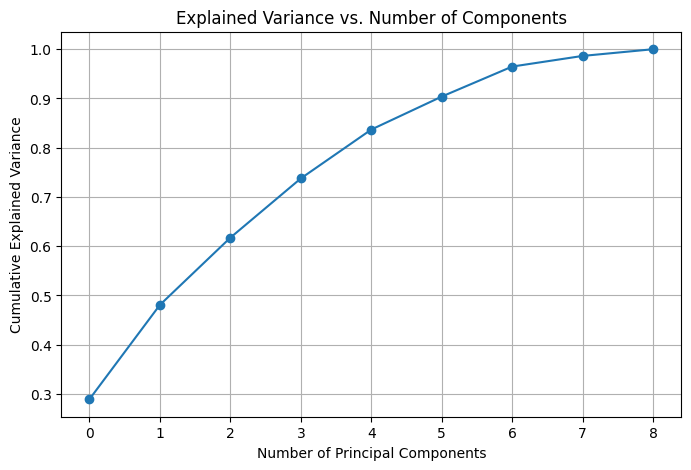

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Standardize data first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA and check explained variance
pca = PCA().fit(X_train_scaled)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()


In [111]:
# Load dataset (Example: Red Wine Classification)
X = df_red.drop(columns=["quality"])  # Features
y = df_red["quality"]  # Classification target (Multiclass)

# Step 1: Split Data (Train: 70%, Validation: 15%, Test: 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

#Step 2: Scale Data (StandardScaler is needed before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA (Reduce to 5 components)
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on training data
X_val_pca = pca.transform(X_val_scaled)  # Transform validation set
X_test_pca = pca.transform(X_test_scaled)  # Transform test set

# Step 4: Train a Classifier (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

#Step 5: Evaluate on Validation Set
y_val_pred = rf_model.predict(X_val_pca)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with PCA: {accuracy_val:.4f}")



Validation Accuracy with PCA: 0.9500


In [112]:
#Step 6: Evaluate on Test Set
y_test_pred = rf_model.predict(X_test_pca)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with PCA: {accuracy_test:.4f}")

Test Accuracy with PCA: 0.9458


In [113]:
from sklearn.decomposition import PCA

# Train-validation-test split (70%-15%-15%)
X_train, X_temp, y_train_binary, y_temp_binary = train_test_split(X_scaled, y_binary, test_size=0.30, random_state=42, stratify=y_binary)
X_val, X_test, y_val_binary, y_test_binary = train_test_split(X_temp, y_temp_binary, test_size=0.50, random_state=42, stratify=y_temp_binary)

X_train, X_temp, y_train_multi, y_temp_multi = train_test_split(X_scaled, y_multiclass, test_size=0.30, random_state=42, stratify=y_multiclass)
X_val, X_test, y_val_multi, y_test_multi = train_test_split(X_temp, y_temp_multi, test_size=0.50, random_state=42, stratify=y_temp_multi)

# Apply PCA (Reduce to 5 components)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Train Decision Tree on PCA Data
dt_pca_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_pca_model.fit(X_train_pca, y_train_multi)

# Predictions
y_pred_val_dt_pca = dt_pca_model.predict(X_val_pca)

# Evaluate Model
accuracy_dt_val_pca = accuracy_score(y_val_multi, y_pred_val_dt_pca)
print(f"Decision Tree Classifier with PCA Accuracy: {accuracy_dt_val_pca:.4f}")




Decision Tree Classifier with PCA Accuracy: 0.6333


In [114]:
# Predictions
y_pred_test_dt_pca = dt_pca_model.predict(X_test_pca)

# Evaluate Model
accuracy_dt_test_pca = accuracy_score(y_test_multi, y_pred_test_dt_pca)
print(f"Decision Tree Classifier with PCA Accuracy: {accuracy_dt_test_pca:.4f}")


Decision Tree Classifier with PCA Accuracy: 0.6458


In [115]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_multi)

# Predictions
y_pred_val_knn = knn_model.predict(X_val)

# Evaluate Model
accuracy_knn = accuracy_score(y_val_multi, y_pred_val_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_val_multi, y_pred_val_knn))




KNN Classifier Accuracy: 0.6292

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       111
           1       0.58      0.58      0.58        96
           2       0.62      0.45      0.53        33

    accuracy                           0.63       240
   macro avg       0.62      0.59      0.60       240
weighted avg       0.63      0.63      0.63       240



In [116]:
# Predictions
y_pred_test_knn = knn_model.predict(X_test)

# Evaluate Model
accuracy_knn = accuracy_score(y_test_multi, y_pred_test_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test_multi, y_pred_test_knn))

KNN Classifier Accuracy: 0.6208

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       112
           1       0.54      0.58      0.56        96
           2       0.69      0.56      0.62        32

    accuracy                           0.62       240
   macro avg       0.64      0.61      0.62       240
weighted avg       0.63      0.62      0.62       240



In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train_multi)

# Predict
y_pred_val_svm = svm_classifier.predict(X_val)

# Evaluate
accuracy_svm = accuracy_score(y_val_multi, y_pred_val_svm)
print(f"SVM Classification Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_val_multi, y_pred_val_svm))




SVM Classification Accuracy: 0.6750

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       111
           1       0.59      0.66      0.62        96
           2       0.83      0.45      0.59        33

    accuracy                           0.68       240
   macro avg       0.72      0.62      0.65       240
weighted avg       0.69      0.68      0.67       240



In [118]:
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test_multi, y_pred_svm)
print(f"SVM Classification Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred_svm))

SVM Classification Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       112
           1       0.60      0.59      0.60        96
           2       0.62      0.41      0.49        32

    accuracy                           0.67       240
   macro avg       0.65      0.60      0.62       240
weighted avg       0.66      0.67      0.66       240



In [174]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Define NN model for regression
model_reg = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")  # Linear activation for regression
])

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_reg.compile(optimizer=optimizer, loss="mse", metrics=["mae"])



early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train with Early Stopping
model_reg.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])


# Train the model
# model_reg.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Predict on val set

y_pred_nn_val = model_reg.predict(X_val_scaled).flatten()
# Predict on test set



# Evaluate Model
mse_nn1 = mean_squared_error(y_val, y_pred_nn_val)
r2_nn1 = r2_score(y_val, y_pred_nn_val)



print("Neural Network Regression Results:")
print(f"Neural Network Regression - MSE Validation: {mse_nn1:.4f}")
print(f"Neural Network Regression - R² Score Validation: {r2_nn1:.4f}")


Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 21.5343 - mae: 4.4452 - val_loss: 4.5717 - val_mae: 1.5742
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3011 - mae: 1.3405 - val_loss: 2.7637 - val_mae: 1.2829
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0082 - mae: 1.1187 - val_loss: 2.3114 - val_mae: 1.1492
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8940 - mae: 1.0772 - val_loss: 2.0198 - val_mae: 1.0794
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5110 - mae: 0.9418 - val_loss: 1.7772 - val_mae: 1.0166
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2174 - mae: 0.8663 - val_loss: 1.7271 - val_mae: 0.9876
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1527 - mae: 0.8470 - val_loss: 1.4540 - val_mae: 0.9049
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0031 - mae: 0.7912 - val_loss: 1.2192 - val_mae: 0.8474
Epoch 9/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8

In [175]:
# Evaluate Model
y_pred_nn = model_reg.predict(X_test_scaled).flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Regression Results:")
print(f"Neural Network Regression - MSE Test: {mse_nn:.4f}")
print(f"Neural Network Regression - R² Score Test: {r2_nn:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Neural Network Regression Results:
Neural Network Regression - MSE Test: 0.3798
Neural Network Regression - R² Score Test: 0.4166


In [120]:
# Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]

from sklearn.preprocessing import LabelEncoder

# Encode target variable to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Now classes start from 0

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define NN model for multiclass classification
model_multi = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(6, activation="softmax")  # Softmax activation for multiclass classification (3 classes)
])

# Compile model
model_multi.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train model
model_multi.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Predict on Evaluation set
y_pred_multi_val = model_multi.predict(X_val_scaled)

y_pred_multi_val = y_pred_multi_val.argmax(axis=1)  # Convert probabilities to class labels

#Evaluate Model
accuracy_nn_multi = accuracy_score(y_val, y_pred_multi_val)
print(f"NN Multiclass Classification Accuracy: {accuracy_nn_multi:.4f}")




Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4786 - loss: 1.5172 - val_accuracy: 0.8036 - val_loss: 0.8234
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8626 - loss: 0.6161 - val_accuracy: 0.8839 - val_loss: 0.5156
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9192 - loss: 0.3542 - val_accuracy: 0.9107 - val_loss: 0.3934
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9542 - loss: 0.2635 - val_accuracy: 0.9241 - val_loss: 0.3341
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9473 - loss: 0.2399 - val_accuracy: 0.9286 - val_loss: 0.2884
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9457 - loss: 0.2099 - val_accuracy: 0.9286 - val_loss: 0.2725
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9550 - loss: 0.1679 - val_accuracy: 0.9241 - val_loss: 0.2718
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9607 - loss: 0.1315 - val_accuracy: 0.9241 - val_loss: 0.

In [121]:
# Predict on test set

y_pred_multi_test = model_multi.predict(X_test_scaled)

y_pred_multi = y_pred_multi_test.argmax(axis=1)  # Convert probabilities to class labels



# Evaluate model
accuracy_nn_multi = accuracy_score(y_test, y_pred_multi)
print(f"NN Multiclass Classification Accuracy: {accuracy_nn_multi:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
NN Multiclass Classification Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.38      0.43         8
           2       0.93      0.99      0.96       102
           3       1.00      0.97      0.98        96
           4       0.93      0.93      0.93        30
           5       0.00      0.00      0.00         2

    accuracy                           0.94       240
   macro avg       0.56      0.54      0.55       240
weighted avg       0.93      0.94      0.93       240



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
